#Importamos librerías#

Importamos librerias

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split

#Defininimos el data set #

In [13]:
seed = 8
np.random.seed(seed)

def spirals(points, noise=.5):
    n = np.sqrt(np.random.rand(points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(points),np.ones(points))))


X, y = spirals(1000)
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(2000, 2)
(2000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


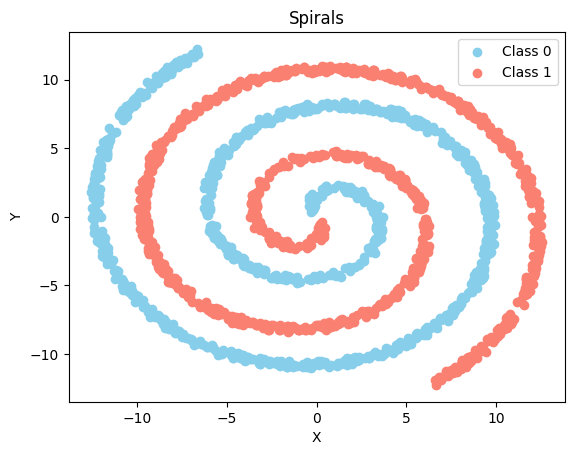

In [14]:

def plot_spirals(X, y):
    plt.scatter(X[y==0, 0], X[y==0, 1], c='skyblue', label='Class 0')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='salmon', label='Class 1')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Spirals')
    plt.legend()
    plt.show()


# Graficar las espirales
plot_spirals(X, y)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

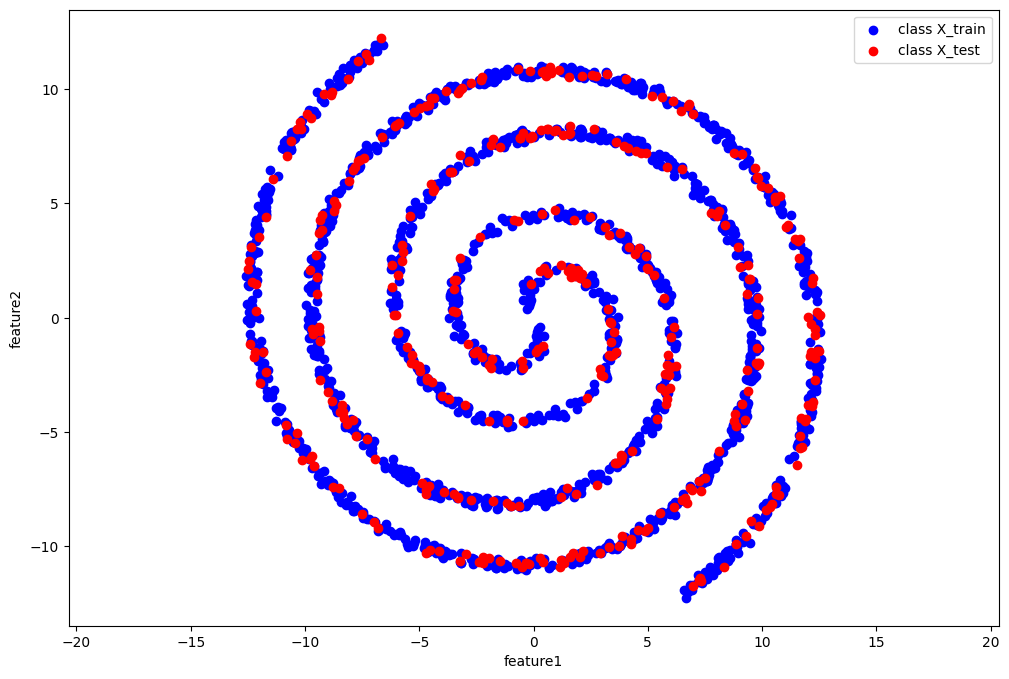

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0],X_train[:,1], color = 'b', label = 'class X_train')
plt.scatter(X_test[:,0],X_test[:,1], color = 'r', label = 'class X_test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

#Definimos la estructura del modelo

In [17]:
# Hiperparametros
training_epochs = 300 
learning_rate = 0.001 

In [18]:
def create_model():
    model = tf.keras.Sequential()
    # Input layer
    model.add(tf.keras.layers.Dense(12, input_dim=2, activation='relu'))
    model.add(tf.keras.layers.Dense(12,activation='relu'))
    model.add(tf.keras.layers.Dense(12,activation='relu'))
    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile a model
    model.compile(loss='binary_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(learning_rate),
                metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                36        
                                                                 
 dense_5 (Dense)             (None, 12)                156       
                                                                 
 dense_6 (Dense)             (None, 12)                156       
                                                                 
 dense_7 (Dense)             (None, 1)                 13        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


#Entrenamiento del modelo

In [19]:
results = model.fit(
 X_train, y_train.T,
 epochs= training_epochs,
 validation_data = (X_test, y_test.T),
 verbose = 0
)

# Desempeño del modelo

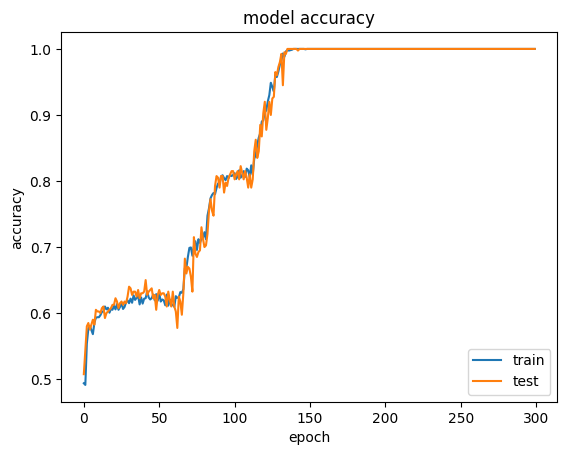

In [20]:
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

In [21]:
prediction_values = model.predict(X_test)
print("Prediction values shape:", prediction_values.shape)

13/13 [==============================] - 0s 2ms/step
Prediction values shape: (400, 1)


Maximum Loss : 1.0178

Minimum Loss : 0.0001

Loss difference : 1.0177


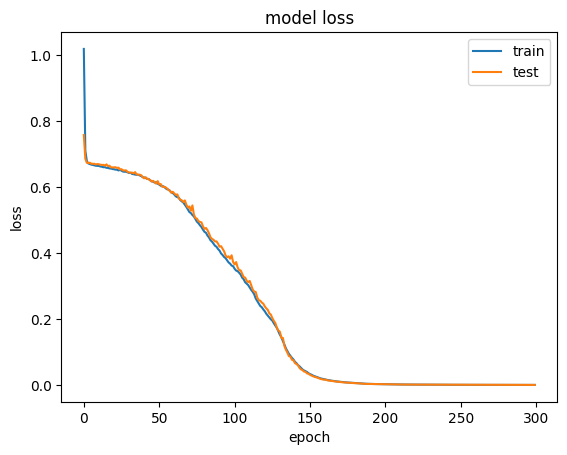

In [22]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

5000/5000 [==============================] - 10s 2ms/step


Text(0.5, 1.0, 'Clasificación')

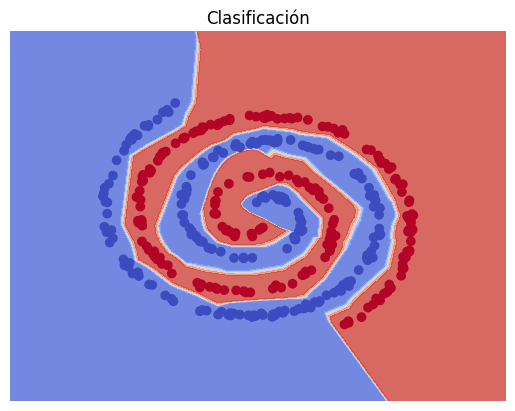

In [23]:
xx = np.linspace(-20, 20, 400)
yy = np.linspace(-20, 20, 400)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict(np.c_[gx.ravel(), gy.ravel()])
Z = Z.reshape(gx.shape)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-20, 20])
axes.set_ylim([-20, 20])
plt.grid('off')
plt.axis('off')

plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Clasificación')